<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function
from __future__ import absolute_import

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Sources of Error

Error can come from many sources when using applying a numerical method:
 - Model/Data Error
 - Truncation Error
 - Floating Point Error
 
**Goal:** Categorize and understand each type of error and explore some simple approaches to analyzing error.

## Model and Data Error

Errors in fundamental formulation
 - Lotka-Volterra - fractional rabbits, no extinctions, etc.
 - Data Error - Inaccuracy in measurement or uncertainties in parameters
 
Unfortunatley we cannot control model and data error directly but we can use methods that may be more robust in the presense of these types of errors.

## Truncation Error

Errors arising from approximating a function with a simpler function, e.g. $sin(x) \approx x$ for $|x| \approx 0$. 

## Floating Point Error

Errors arising from approximating real numbers with finite-precision numbers and arithmetic.

## Basic Definitions

Given a true value of a function $f$ and an approximate solution $F$ define:

Absolute Error:  
$$
    e = | f - F |
$$

Relative Error:  
$$
    r = \frac{e}{|f|} = \frac{|f - F|}{|f|}
$$

Decimal precision $p$ is defined as the minimum value that satisfies

$$x = \text{round}(10^{-n} \cdot x) \cdot 10^n$$

where

$$n = \text{floor}(\log_{10} x) + 1 - p$$

Note that if we are asking the decimal precision of the approximation $F$ of $f$ then we need to use the absolute error to determine the precision.  To find the decimal precision in this case look at the magnitude of the absolute error and deterimine the place of the first error.  Combine this with the number of "correct" digits and you will get the decimal precision of the approximation.

## Truncation Error and Taylor's Theorem

**Taylor's Theorem:**  Let $f(x) \in C^{m+1}[a,b]$ and $x_0 \in [a,b]$, then for all $x \in (a,b)$ there exists a number $c = c(x)$ that lies between $x_0$ and $x$ such that

$$ f(x) = T_N(x) + R_N(x)$$

where $T_N(x)$ is the Taylor polynomial approximation

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!}$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$

Another way to think about these results involves replacing $x - x_0$ with $\Delta x$.  The primary idea here is that the residual $R_N(x)$ becomes smaller as $\Delta x \rightarrow 0$.

$$
    T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot\Delta x^n}{n!}
$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$
    R_N(x) = \frac{f^{(n+1)}(c) \cdot \Delta x^{n+1}}{(n+1)!} \leq M \Delta x^{n+1}
$$

#### Example 1

$f(x) = e^x$ with $x_0 = 0$

Using this we can find expressions for the relative and absolute error as a function of $x$ assuming $N=2$.

Derivatives:
$$\begin{aligned}
    f'(x) &= e^x \\
    f''(x) &= e^x \\ 
    f^{(n)}(x) &= e^x
\end{aligned}$$

Taylor polynomials:
$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} e^0 \frac{x^n}{n!} \Rightarrow \\
    T_2(x) &= 1 + x + \frac{x^2}{2}
\end{aligned}$$

Remainders:
$$\begin{aligned}
    R_N(x) &= e^c \frac{x^{n+1}}{(n+1)!} = e^c \cdot \frac{x^3}{6} \quad \Rightarrow \\
    R_2(x) &\leq \frac{e^1}{6} \approx 0.5
\end{aligned}$$

Accuracy:
$$
    e^1 = 2.718\ldots \\
    T_2(1) = 2.5 \Rightarrow e \approx 0.2 ~~ r \approx 0.1
$$

We can also use the package sympy which has the ability to calculate Taylor polynomials built-in!

In [ ]:
import sympy
x = sympy.symbols('x')
f = sympy.symbols('f', cls=sympy.Function)

f = sympy.exp(x)
f.series(x0=0, n=6)

Lets plot this numerically for a section of $x$.

In [ ]:
x = numpy.linspace(-1, 1, 100)
T_N = 1.0 + x + x**2 / 2.0
R_N = numpy.exp(1) * x**3 / 6.0

plt.plot(x, T_N, 'r', x, numpy.exp(x), 'k', x, R_N, 'b')
plt.plot(0.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
plt.show()

#### Example 2

Approximate
$$
    f(x) = \frac{1}{x} \quad x_0  = 1,
$$
using $x_0 = 1$ to the 3rd Taylor series term.

$$\begin{aligned}
    f'(x) &= -\frac{1}{x^2} \\
    f''(x) &= \frac{2}{x^3} \\
    f^{(n)}(x) &= \frac{(-1)^n n!}{x^{n+1}}
\end{aligned}$$

$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} (-1)^n (x-1)^n \Rightarrow \\
    T_2(x) &= 1 - (x - 1) + (x - 1)^2
\end{aligned}$$

$$\begin{aligned}
    R_N(x) &= \frac{(-1)^{n+1}(x - 1)^{n+1}}{c^{n+2}} \Rightarrow \\
    R_2(x) &= \frac{-(x - 1)^{3}}{c^{4}}
\end{aligned}$$

In [ ]:
x = numpy.linspace(0.8, 2, 100)
T_N = 1.0 - (x-1) + (x-1)**2
R_N = -(x-1.0)**3 / (1.1**4)

plt.plot(x, T_N, 'r', x, 1.0 / x, 'k', x, R_N, 'b')
plt.plot(1.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")

plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=8)
plt.show()

## Big-O Notation

Big-O notation: 
$$
    f(x) = \mathcal{O}(g(x)) \quad \text{as} \quad x \rightarrow a
$$ 
if and only if 
$$
    |f(x)| \leq M |g(x)| \quad \text{as}\quad  |x - a| < \delta \quad \text{where} \quad M,a > 0.
$$ 

In practice we use Big-O notation to say something about how the terms we may have left out of a series might behave.  We saw an example earlier of this with the Taylor's series approximations:

#### Example:
$f(x) = \sin x$ with $x_0 = 0$ then

$$T_N(x) = \sum^N_{n=0} (-1)^{n} \frac{x^{2n+1}}{(2n+1)!}$$

We can actually write $f(x)$ then as

$$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120} + \mathcal{O}(x^7)$$

This becomes more useful when we look at this as we did before with $\Delta x$:

$$f(x) = \Delta x - \frac{\Delta x^3}{6} + \frac{\Delta x^5}{120} + \mathcal{O}(\Delta x^7)$$

**We can also develop rules for error propagation based on Big-O notation:**

In general, there are two theorems that do not need proof and hold when the value of x is large: 

Let
$$\begin{aligned}
    f(x) &= p(x) + \mathcal{O}(x^n) \\
    g(x) &= q(x) + \mathcal{O}(x^m) \\
    k &= \max(n, m)
\end{aligned}$$
then
$$
    f+g = p + q + \mathcal{O}(x^k)
$$
and
\begin{align}
    f \cdot g &= p \cdot q + p \mathcal{O}(x^m) + q \mathcal{O}(x^n) + O(x^{n + m}) \\
    &= p \cdot q + \mathcal{O}(x^{n+m})
\end{align}

On the other hand, if we are interested in small values of x, say $\Delta x$, the above expressions can be modified as follows: 

\begin{align}
    f(\Delta x) &= p(\Delta x) + \mathcal{O}(\Delta x^n) \\
    g(\Delta x) &= q(\Delta x) + \mathcal{O}(\Delta x^m) \\
    r &= \min(n, m)
\end{align}
then
$$
    f+g = p + q + O(\Delta x^r)
$$
and
\begin{align}
    f \cdot g &= p \cdot q + p \cdot \mathcal{O}(\Delta x^m) + q \cdot \mathcal{O}(\Delta x^n) + \mathcal{O}(\Delta x^{n+m}) \\
    &= p \cdot q + \mathcal{O}(\Delta x^r)
\end{align}

**Note 1:** In this case we suppose that at least the polynomial with $k = \max(n, m)$ has the following form: 

$$
    p(\Delta x) = 1 + p_1 \Delta x + p_2 \Delta x^2 + \ldots
$$
or 
$$
    q(\Delta x) = 1 + q_1 \Delta x + q_2 \Delta x^2 + \ldots
$$

so that there is an $\mathcal{O}(1)$ term that guarantees the existence of $\mathcal{O}(\Delta x^r)$ in the final product. 

To get a sense of why we care most about the power on $\Delta x$ when considering convergence the following figure shows how different powers on the convergence rate can effect how quickly we converge to our solution.  Note that here we are plotting the same data two different ways.  Plotting the error as a function of $\Delta x$ is a common way to show that a numerical method is doing what we expect and exhibits the correct convergence behavior.  Since errors can get small quickly it is very common to plot these sorts of plots on a log-log scale to easily visualize the results.  Note that if a method was truly of the order $n$ that they will be a linear function in log-log space with slope $n$.

In [ ]:
dx = numpy.linspace(1.0, 1e-4, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

for n in range(1, 5):
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)

axes[0].legend(loc=2)
axes[1].set_xticks([10.0**(-n) for n in range(5)])
axes[1].set_yticks([10.0**(-n) for n in range(16)])
axes[1].legend(loc=4)
for n in range(2):
    axes[n].set_title("Growth of Error vs. $\Delta x^n$")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Estimated Error")
    axes[n].set_title("Growth of different")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Estimated Error")

plt.show()

## Operation Counting

### Example 1: Matrix-Vector Multiplication

Let $A, B \in \mathbb{R}^{N \times N}$ and $x \in \mathbb{R}^N$.  

1. Count the approximate number of operations it will take to compute $A x$.
2. Do the same for $A B$.

Matrix-vector product:  Defining $[A]_i$ as the $i$th row of $A$ and $A_{ij}$ as the $i$, $j$th entry then
$$
    A x = \sum^N_{i=1} [A]_i \cdot x = \sum^N_{i=1} \sum^N_{j=1} A_{ij} x_j
$$

Take a explicit case, say $N = 3$, then the operation count is
$$
    A x = [A]_1 \cdot v + [A]_2 \cdot v + [A]_3 \cdot v = \begin{bmatrix}
        A_{11} \times v_1 + A_{12} \times v_2 + A_{13} \times v_3 \\
        A_{21} \times v_1 + A_{22} \times v_2 + A_{23} \times v_3 \\
        A_{31} \times v_1 + A_{32} \times v_2 + A_{33} \times v_3
    \end{bmatrix}
$$

This leads to 15 operations (6 additions and 9 multiplications).  

Take another case, say $N = 4$, then the operation count is
$$
    A x = [A]_1 \cdot v + [A]_2 \cdot v + [A]_3 \cdot v = \begin{bmatrix}
        A_{11} \times v_1 + A_{12} \times v_2 + A_{13} \times v_3 + A_{14} \times v_4 \\
        A_{21} \times v_1 + A_{22} \times v_2 + A_{23} \times v_3 + A_{24} \times v_4 \\
        A_{31} \times v_1 + A_{32} \times v_2 + A_{33} \times v_3 + A_{34} \times v_4 \\
        A_{41} \times v_1 + A_{42} \times v_2 + A_{43} \times v_3 + A_{44} \times v_4 \\
    \end{bmatrix}
$$

This leads to 28 operations (12 additions and 16 multiplications).

Generalizing this there are $N^2$ multiplications and $N (N -1)$ additions for a total of

$$
    \text{operations} = N (N - 1) + N^2 = \mathcal{O}(N^2).
$$

Matrix-Matrix product ($AB$):  Defining $[B]_j$ as the $j$th column of $B$ then
$$
    (A B)_{ij} = \sum^N_{i=1} \sum^N_{j=1} [A]_i \cdot [B]_j
$$
The inner product of two vectors is represented by
$$
    a \cdot b = \sum^N_{i=1} a_i b_i
$$
leading to $\mathcal{O}(3N)$ operations.  Since there are $N^2$ entries in the resulting matrix then we would have $\mathcal{O}(N^3)$ operations.

There are methods for performing matrix-matrix multiplication faster.  In the following figure we see a collection of algorithms over time that have been able to bound the number of operations in certain circumstances.  Here
$$
    \mathcal{O}(N^\omega)
$$
![matrix multiplication operation bound](./images/bound_matrix_multiply.png)

### Example 2:  Horner's Method for Evaluating Polynomials

Given 

$$P_N(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_N x^N$$ 

or

$$P_N(x) = p_1 x^N + p_2 x^{N-1} + p_3 x^{N-2} + \ldots + p_{N+1}$$

want to find best way to evaluate $P_N(x)$.  

First consider two ways to write $P_3$:

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

and using nested multiplication:

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$

Consider how many operations it takes for each...

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

$$P_3(x) = \overbrace{p_1 \cdot x \cdot x \cdot x}^3 + \overbrace{p_2 \cdot x \cdot x}^2 + \overbrace{p_3 \cdot x}^1 + p_4$$

Adding up all the operations we can in general think of this as a pyramid

![Original Count](./images/horners_method_big_count.png)

We can estimate this way that the algorithm written this way will take approximately $O(N^2 / 2)$ operations to complete.

Looking at our other means of evaluation:

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$

Here we find that the method is $O(N)$ (the 2 is usually ignored in these cases).  The important thing is that the first evaluation is $O(N^2)$ and the second $O(N)$!

#### Algorithm

Fill in the function and implement Horner's method:
```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    pass
```

In [ ]:
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    ### ADD CODE HERE
    pass

In [ ]:
# Scalar version
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    
    y = p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

# Vectorized version
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x can by a NumPy ndarray.
    """
    
    y = numpy.ones(x.shape) * p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

p = [1, -3, 10, 4, 5, 5]
x = numpy.linspace(-10, 10, 100)
plt.plot(x, eval_poly(p, x))
plt.show()

## Truncation Error vs. Floating Point Error

Truncation error:  Errors arising from approximation of a function, truncation of a series...

$$\sin x \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} + O(x^7)$$

Floating-point Error:  Errors arising from approximating real numbers with finite-precision numbers

$$\pi \approx 3.14$$

or $\frac{1}{3} \approx 0.333333333$ in decimal, results form finitely number of registers to represent each number.


### Floating Point Systems

Numbers in floating point systems are represented as a series of bits that represent different pieces of a number.  In *normalized floating point systems* there are some standard conventions for what these bits are used for.  In general the numbers are stored by breaking them down into the form  

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

where
1. $\pm$ is a single bit and of course represents the sign of the number
2. $d_1 . d_2 d_3 d_4 \ldots d_p$ is called the *mantissa*.  Note that technically the decimal could be moved but generally, using scientific notation, the decimal can always be placed at this location.  The digits $d_2 d_3 d_4 \ldots d_p$ are called the *fraction* with $p$ digits of precision.  Normalized systems specifically put the decimal point in the front like we have and assume $d_1 \neq 0$ unless the number is exactly $0$.
3. $\beta$ is the *base*.  For binary $\beta = 2$, for decimal $\beta = 10$, etc.
4. $E$ is the *exponent*, an integer in the range $[E_{\min}, E_{\max}]$

The important points on any floating point system is that
1. There exist a discrete and finite set of representable numbers
2. These representable numbers are not evenly distributed on the real line
3. Arithmetic in floating point systems yield different results from infinite precision arithmetic (i.e. "real" math)

#### Properties of Floating Point Systems
All floating-point systems are characterized by several important numbers
 - Smalled normalized number (underflow if below - related to subnormal numbers around zero)
 - Largest normalized number (overflow if above)
 - Zero
 - Machine $\epsilon$ or $\epsilon_{\text{machine}}$
 - `inf` and `nan`, infinity and **N**ot **a** **N**umber respectively

##### Example:  Toy System
Consider the toy 2-digit precision decimal system (normalized)
$$f = \pm d_1 . d_2 \times 10^E$$
with $E \in [-2, 0]$.

**Number and distribution of numbers**
1. How many numbers can we represent with this system?

2. What is the distribution on the real line?

3. What is the underflow and overflow limits?


How many numbers can we represent with this system?

$$
    f = \pm d_1 . d_2 \times 10^E ~~~ \text{with} E \in [-2, 0]
$$

$$ 
    2 \times 9 \times 10 \times 3 + 1 = 541
$$

What is the distribution on the real line?

In [ ]:
d_1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
d_2_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
E_values = [0, -1, -2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-0.1, 0.1])
plt.show()

What is the underflow and overflow limits?

Smallest number that can be represented is the underflow:  $1.0 \times 10^{-2} = 0.01$
Largest number that can be represented is the overflow:  $9.9 \times 10^0 = 9.9$

### Binary Systems
Consider the 2-digit precision base 2 system:

$$
    f=\pm d_1 . d_2 \times 2^E \quad \text{with} \quad E \in [-1, 1]
$$

#### Number and distribution of numbers
1. How many numbers can we represent with this system?

2. What is the distribution on the real line?

3. What is the underflow and overflow limits?


How many numbers can we represent with this system?

$$f=\pm d_1 . d_2 \times 2^E ~~~~ \text{with} ~~~~ E \in [-1, 1]$$

$$ 2 \times 1 \times 2 \times 3 + 1 = 13$$

What is the distribution on the real line?

In [ ]:
d_1_values = [1]
d_2_values = [0, 1]
E_values = [1, 0, -1]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-4.5, 4.5], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-3.5, 3.5])
plt.show()

Smallest number that can be represented is the underflow:  $1.0 \times 2^{-1} = 0.5$

Largest number that can be represented is the overflow:  $1.1 \times 2^1 = 3$

Note that these numbers are in a binary system.  

Quick rule of thumb:
$$
    2^3 2^2 2^1 2^0 . 2^{-1} 2^{-2} 2^{-3}
$$
correspond to
8s, 4s, 2s, 1s . halves, quarters, eighths, ...

### Real Systems - IEEE 754 Binary Floating Point Systems

#### Single Precision
 - Total storage alloted is 32 bits
 - Exponent is 8 bits $\Rightarrow E \in [-126, 127]$
 - Fraction 23 bits ($p = 24$)
 
```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
Overflow $= 2^{127} \approx 3.4 \times 10^{38}$

Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$

$\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$

#### Double Precision
 - Total storage alloted is 64 bits
 - Exponent is 11 bits $\Rightarrow E \in [-1022, 1024]$
 - Fraction 52 bits ($p = 53$)
 
```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$

Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$

$\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

### Python Access to IEEE Numbers

Access many important parameters, such as machine epsilon:

```python
import numpy
numpy.finfo(float).eps
```

In [ ]:
print(numpy.finfo(numpy.float16))
print(numpy.finfo(numpy.float32))
print(numpy.finfo(float))
print(numpy.finfo(numpy.float128))

## Why should we care about this?

 - Floating point arithmetic is not commutative or associative
 - Floating point errors compound, do not assume even double precision is enough!
 - Mixing precision is very dangerous

### Example 1: Simple Arithmetic
 
Simple arithmetic $\delta < \epsilon_{\text{machine}}$

   $$(1+\delta) - 1 = 1 - 1 = 0$$

   $$1 - 1 + \delta = \delta$$

### Example 2: Catastrophic cancellation 

Let us examine what happens when we add two numbers $x$ and $y$ where $x + y \neq 0$.  We can actually estimate these bounds by doing some error analysis.  Here we need to introduce the idea that each floating point operation introduces an error such that

$$
    \text{fl}(x ~\text{op}~ y) = (x ~\text{op}~ y) (1 + \delta)
$$

where $\text{fl}(\cdot)$ is a function that returns the floating point representation of the expression enclosed, $\text{op}$ is some operation (e.g. $+, -, \times, /$), and $\delta$ is the floating point error due to $\text{op}$.

Back to our problem at hand.  The floating point error due to addition is

$$
    \text{fl}(x + y) = (x + y) (1 + \delta).
$$

Comparing this to the true solution using a relative error we have

$$\begin{aligned}
    \frac{(x + y) - \text{fl}(x + y)}{x + y} &= \frac{(x + y) - (x + y) (1 + \delta)}{x + y} = \delta.
\end{aligned}$$

so that if $\delta = \mathcal{O}(\epsilon_{\text{machine}})$ we are not too concerned.

What if instead we consider a floating point error on the representations of $x$ and $y$, $x \neq y$, and say $\delta_x$ and $\delta_y$ are the magnitude of the errors in their representation.  Here we will assume this constitutes the floating point error rather than being associated with the operation itself.

Given all of this we then would have

$$\begin{aligned}
    \text{fl}(x + y) &= x (1 + \delta_x) + y (1 + \delta_y) \\
    &= x + y + x \delta_x + y \delta_y \\
    &= (x + y) \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right)
\end{aligned}$$

Again computing the relative error we then have

$$\begin{aligned}
    \frac{x + y - (x + y) \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right)}{x + y} &= 1 - \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right) \\
    &= \frac{x}{x + y} \delta_x + \frac{y}{x + y} \delta_y \\
    &= \frac{1}{x + y} (x \delta_x + y \delta_y)
\end{aligned}$$

The important distinction here is that now the error is dependent on the values of $x$ and $y$ and more importantly, there sum.  Of particular concern is the relative size of $x + y$.  As it approaches zero relative to the magnitudes of $x$ and $y$ the error could be arbitrarily large.  This is known as **catastrophic cancellation**.

In [ ]:
dx = numpy.array([10**(-n) for n in range(1, 16)])
x = 1.0 + dx
y = -numpy.ones(x.shape)
error = numpy.abs(x + y - dx) / (dx)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.loglog(dx, x + y, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$x + y$")
axes.set_title("$\Delta x$ vs. $x+y$")

axes = fig.add_subplot(1, 2, 2)
axes.loglog(dx, error, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|x + y - \Delta x| / \Delta x$")
axes.set_title("Difference between $x$ and $y$ vs. Relative Error")

plt.show()

### Example 3: Function Evaluation

Consider the function
$$
    f(x) = \frac{1 - \cos x}{x^2}
$$
with $x\in[-10^{-4}, 10^{-4}]$.  

Taking the limit as $x \rightarrow 0$ we can see what behavior we would expect to see from evaluating this function:
$$
    \lim_{x \rightarrow 0} \frac{1 - \cos x}{x^2} = \lim_{x \rightarrow 0} \frac{\sin x}{2 x} = \lim_{x \rightarrow 0} \frac{\cos x}{2} = \frac{1}{2}.
$$

What does floating point representation do?

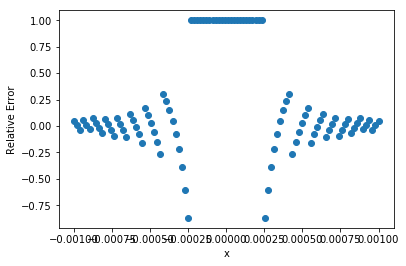

In [2]:
x = numpy.linspace(-1e-3, 1e-3, 100, dtype=numpy.float32)
# x = numpy.linspace(-1e-3, 1e-3, 100, dtype=numpy.float64)
error = (0.5 - (1.0 - numpy.cos(x)) / x**2) / 0.5

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error, 'o')
axes.set_xlabel("x")
axes.set_ylabel("Relative Error")

### Example 4: Evaluation of a Polynomial

   $$f(x) = x^7 - 7x^6 + 21 x^5 - 35 x^4 + 35x^3-21x^2 + 7x - 1$$

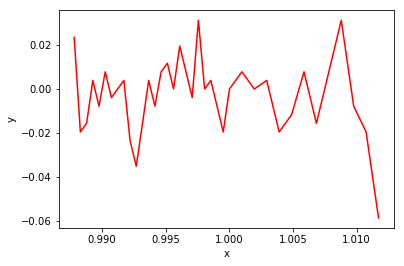

In [5]:
x = numpy.linspace(0.988, 1.012, 1000, dtype=numpy.float16) # numpy.float64
y = x**7 - 7.0 * x**6 + 21.0 * x**5 - 35.0 * x**4 + 35.0 * x**3 - 21.0 * x**2 + 7.0 * x - 1.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, y, 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

### Example 5: Rational Function Evaluation
Compute $f(x) = x + 1$ by the function $$F(x) = \frac{x^2 - 1}{x - 1}$$.

Do you expect there to be issues?

In [ ]:
x = numpy.linspace(0.5, 1.5, 101, dtype=numpy.float16)
f_hat = (x**2 - 1.0) / (x - 1.0)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.abs(f_hat - (x + 1.0)))
axes.set_xlabel("$x$")
axes.set_ylabel("Absolute Error")
plt.show()

## Combination of Error

In general we need to concern ourselves with the combination of both truncation error and floating point error.

### Example 1

Consider the finite difference approximation where $f(x) = e^x$ and we are evaluating at $x=1$?

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Compare the error between decreasing $\Delta x$ and the true solution $f'(1) = e$.

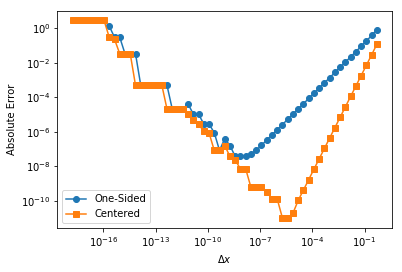

In [6]:
delta_x = numpy.linspace(1e-20, 5.0, 100)
delta_x = numpy.array([2.0**(-n) for n in range(1, 60)])
x = 1.0
f_hat_1 = (numpy.exp(x + delta_x) - numpy.exp(x)) / (delta_x)
f_hat_2 = (numpy.exp(x + delta_x) - numpy.exp(x - delta_x)) / (2.0 * delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, numpy.abs(f_hat_1 - numpy.exp(1)), 'o-', label="One-Sided")
axes.loglog(delta_x, numpy.abs(f_hat_2 - numpy.exp(1)), 's-', label="Centered")
axes.legend(loc=3)
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Absolute Error")
plt.show()

when truncating error is smaller than floating point error (1e-7) in this case, the error again becomes larger. Taking some as small as possible doesn't always work in the case of floating point error.

### Example 2

Evaluate $e^x$ with its Taylor series.

$$e^x = \sum^\infty_{n=0} \frac{x^n}{n!}$$

Can we pick $N < \infty$ that can approximate $e^x$ over a give range $x \in [a,b]$ such that the relative error $E$ satisfies $E < 8 \cdot \varepsilon_{\text{machine}}$?

What might be a better way than simply evaluating the Taylor polynomial directly for various $N$?

49


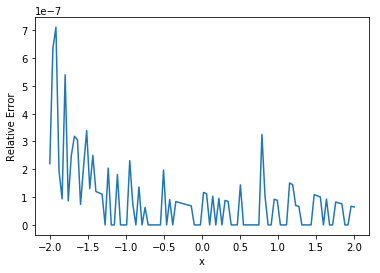

In [7]:
import scipy.misc

def my_exp(x, N=10):
    value = 0.0
    for n in range(N + 1):
        value += x**n / scipy.misc.factorial(n)
        
    return value

x = numpy.linspace(-2, 2, 100, dtype=numpy.float32)
for N in range(1, 50):
    error = numpy.abs((numpy.exp(x) - my_exp(x, N=N)) / numpy.exp(x))
    if numpy.all(error < 8.0 * numpy.finfo(float).eps):
        break

print(N)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error)
axes.set_xlabel("x")
axes.set_ylabel("Relative Error")
plt.show()

### Example 3 - Relative Error

Say we wanted to compute the relative error between two values $x$ and $y$ using $x$ as the normalizing value.  Algebraically the forms
$$
    E = \frac{x - y}{x}
$$
and
$$
    E = 1 - \frac{y}{x}
$$
are equivalent.  In finite precision what form might be expected to be more accurate and why?

*Example based on a [blog](https://nickhigham.wordpress.com/2017/08/14/how-and-how-not-to-compute-a-relative-error/) post by Nick Higham*

Using this model the original definition contains two floating point operations such that
$$\begin{aligned}
    E_1 = \text{fl}\left(\frac{x - y}{x}\right) &= \text{fl}(\text{fl}(x - y) / x) \\
    &= \left[ \frac{(x - y) (1 + \delta_+)}{x} \right ] (1 + \delta_/) \\
    &= \frac{x - y}{x}  (1 + \delta_+) (1 + \delta_/)
\end{aligned}$$

For the other formulation we have
$$\begin{aligned}
    E_2 = \text{fl}\left( 1 - \frac{y}{x} \right ) &= \text{fl}\left(1 - \text{fl}\left(\frac{y}{x}\right) \right) \\
    &= \left(1 - \frac{y}{x} (1 + \delta_/) \right) (1 + \delta_-)
\end{aligned}$$

If we assume that all $\text{op}$s have similar error magnitudes then we can simplify things by letting
$$
    |\delta_\ast| \le \epsilon.
$$

To compare the two formulations we again use the relative error between the true relative error $e_i$ and our computed versions $E_i$.

Original definition:
$$\begin{aligned}
    \frac{e - E_1}{e} &= \frac{\frac{x - y}{x} - \frac{x - y}{x}  (1 + \delta_+) (1 + \delta_/)}{\frac{x - y}{x}} \\
    &\le 1 - (1 + \epsilon) (1 + \epsilon) = 2 \epsilon + \epsilon^2
\end{aligned}$$

e: true solution
E1: adding floating point error
the output shows no big problem, the error is what the machine can deal.

Manipulated definition:

$$\begin{aligned}
    \frac{e - E_2}{e} &= \frac{e - \left[1 - \frac{y}{x}(1 + \delta_/) \right] (1 + \delta_-)}{e} \\
    &= \frac{e - \left[e - \frac{y}{x} \delta_/) \right] (1 + \delta_-)}{e} \\
    &= \frac{e - \left[e + e\delta_- - \frac{y}{x} \delta_/ - \frac{y}{x} \delta_/ \delta_-)) \right] }{e} \\
    &= - \delta_- + \frac{1}{e} \frac{y}{x} \left(\delta_/ + \delta_/ \delta_- \right) \\
    &= - \delta_- + \frac{1 -e}{e} \left(\delta_/ + \delta_/ \delta_- \right) \\
    &\le \epsilon + \left |\frac{1 - e}{e}\right | (\epsilon + \epsilon^2)
\end{aligned}$$

We see then that our floating point error will be dependent on the relative magnitude of $e$

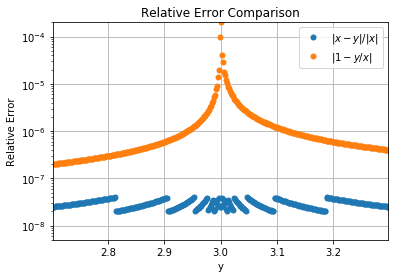

In [8]:
# Based on the code by Nick Higham
# https://gist.github.com/higham/6f2ce1cdde0aae83697bca8577d22a6e
# Compares relative error formulations using single precision and compared to double precision

N = 501    # Note: Use 501 instead of 500 to avoid the zero value
d = numpy.finfo(numpy.float32).eps * 1e4
a = 3.0
x = a * numpy.ones(N, dtype=numpy.float32)
y = [x[i] + numpy.multiply((i - numpy.divide(N, 2.0, dtype=numpy.float32)), d, dtype=numpy.float32) for i in range(N)]

# Compute errors and "true" error
relative_error = numpy.empty((2, N), dtype=numpy.float32)
relative_error[0, :] = numpy.abs(x - y) / x
relative_error[1, :] = numpy.abs(1.0 - y / x)
exact = numpy.abs( (numpy.float64(x) - numpy.float64(y)) / numpy.float64(x))

# Compute differences between error calculations
error = numpy.empty((2, N))
for i in range(2):
    error[i, :] = numpy.abs((relative_error[i, :] - exact) / numpy.abs(exact))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(y, error[0, :], '.', markersize=10, label="$|x-y|/|x|$")
axes.semilogy(y, error[1, :], '.', markersize=10, label="$|1-y/x|$")

axes.grid(True)
axes.set_xlabel("y")
axes.set_ylabel("Relative Error")
axes.set_xlim((numpy.min(y), numpy.max(y)))
axes.set_ylim((5e-9, numpy.max(error[1, :])))
axes.set_title("Relative Error Comparison")
axes.legend()
plt.show()

try single precision and double precision yourself.

Some other links that might be helpful regarding IEEE Floating Point:
 - [What Every Computer Scientist Should Know About Floating-Point Arithmetic](http://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)
 - [IEEE 754 Floating Point Calculator](http://babbage.cs.qc.edu/courses/cs341/IEEE-754.html)
 - [Numerical Computing with IEEE Floating Point Arithmetic](http://epubs.siam.org/doi/book/10.1137/1.9780898718072)